# Project IV: Image Processing and Computer Vision

# Data loading 

CIFAR-10 
- consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
- There are 50000 training images and 10000 test images.

In [1]:
import pickle
import numpy as np
import pandas as pd


# Function to unpickle CIFAR-10 data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

# Load CIFAR-10 dataset
train1 = unpickle("/Users/tiagovhp/Ironhack/Week_6/Project/cifar-10-batches-py/data_batch_1")
train2 = unpickle("/Users/tiagovhp/Ironhack/Week_6/Project/cifar-10-batches-py/data_batch_2")
train3 = unpickle("/Users/tiagovhp/Ironhack/Week_6/Project/cifar-10-batches-py/data_batch_3")
train4 = unpickle("/Users/tiagovhp/Ironhack/Week_6/Project/cifar-10-batches-py/data_batch_4")
train5 = unpickle("/Users/tiagovhp/Ironhack/Week_6/Project/cifar-10-batches-py/data_batch_5")
test_data = unpickle("/Users/tiagovhp/Ironhack/Week_6/Project/cifar-10-batches-py/test_batch")
label_names = unpickle("/Users/tiagovhp/Ironhack/Week_6/Project/cifar-10-batches-py/batches.meta")



# Visualization of labeled images


Text(0.5, 1.0, "b'deer'")

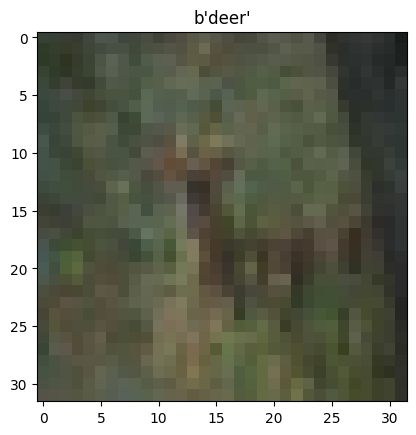

In [2]:
# Function to reshape images
def reshape_image(image):
    # Separate into r,g,b channels
    red_channel = image[:1024]
    green_channel = image[1024:2048]
    blue_channel = image[2048:3072]
    # Reshape each channel into numpy array of each channel (32,32)
    red_channel = red_channel.reshape(32,32)
    green_channel = green_channel.reshape(32,32)
    blue_channel = blue_channel.reshape(32,32)
    # Stack the channels into a new axis to form a 3d array
    reshaped_array = np.stack((red_channel,green_channel,blue_channel), axis=2)
    return reshaped_array

# Function to return name of the image
def label_image(image_nr):
    #image = train1[b'data'][img_nr]
    label_code = train1[b'labels'][img_nr]
    label_name = label_names[b'label_names'][label_code]
    return label_name

# Reshape and label an image
img_nr = 10 # index of image (0 to 10000)
image = train1[b'data'][img_nr]  #original array of image
reshaped_image = reshape_image(image)
image_labeled = label_image(img_nr)

# Plot the image
import matplotlib.pyplot as plt
plt.imshow(reshaped_image)
plt.title(image_labeled)



# Data Normalization

In [3]:
# Normalize datasets
def normalize_data(data):
    data[b'data'] = data[b'data'] / 255.0

normalize_data(train1)
normalize_data(train2)
normalize_data(train3)
normalize_data(train4)
normalize_data(train5)
normalize_data(test_data)

In [4]:

# Function to reshape entire datasets
reshaped_data = np.zeros((10000,32,32,3))
def reshape_dataset(data):
    reshaped_data = np.zeros((10000,32,32,3))
    for i in range(len(data[b'data'])):
        reshaped_data[i]= reshape_image(data[b'data'][i]) #reshape image i
    return reshaped_data



# One-Hot encoding of categorical variables

In [5]:
# Function to one-hot encode labels of dataset
def labels_encoded(data):
    return pd.get_dummies(data[b'labels']).values




In [6]:
# Reshape and encode training data
train_images = np.vstack([reshape_dataset(train) for train in [train1, train2, train3, train4, train5]])
train_labels = np.vstack([labels_encoded(train) for train in [train1, train2, train3, train4, train5]])

In [8]:
# Define the number of folds
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store accuracy for each fold
fold_accuracies = []

# Perform K-fold cross-validation
for train_index, val_index in kf.split(train_images):
    # Split the data into training and validation sets for this fold
    X_train, X_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

# Model Architecture

In [9]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Define the model
model = Sequential()
# Add the input layer
model.add(layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same')) #input shape of a single image
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))  
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2)) 
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
num_classes = train_labels.shape[1]
model.add(layers.Dense(num_classes, activation='softmax'))


model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 653,386 (2.49 MB)

 Trainable params: 653,386 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [10]:
# Using Adam with a custom learning rate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
#optimizer = SGD(learning_rate=0.015, momentum=0.9, nesterov=True)

optimizer = Adam(learning_rate=0.00065)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [11]:
# Define Early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=5,          
                               restore_best_weights=True)

# Train the model with batch_train_1
hisotry = model.fit(train_images, train_labels, epochs=75, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.3040 - loss: 1.8811 - val_accuracy: 0.5144 - val_loss: 1.3385
Epoch 2/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.5392 - loss: 1.2776 - val_accuracy: 0.5936 - val_loss: 1.1717
Epoch 3/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.6169 - loss: 1.0751 - val_accuracy: 0.6414 - val_loss: 1.0191
Epoch 4/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.6725 - loss: 0.9242 - val_accuracy: 0.6642 - val_loss: 0.9400
Epoch 5/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.7133 - loss: 0.8110 - val_accuracy: 0.7155 - val_loss: 0.8180
Epoch 6/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.7460 - loss: 0.7174 - val_accuracy: 0.7271 - val_loss: 0.7964
Epoch 7/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.7739 - loss: 0.6393 - val_accuracy: 0.7256 - val_loss: 0.7914
Epoch 8/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.8028 - loss: 0.5712 - 

# Evaluate the model on test set

In [12]:
from sklearn.metrics import accuracy_score

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy for fold: {val_accuracy}")

# Store the accuracy for this fold
fold_accuracies.append(val_accuracy)

# Calculate average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"Average Validation Accuracy across all folds: {average_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8730 - loss: 0.3713
Validation Accuracy for fold: 0.8557000160217285
Average Validation Accuracy across all folds: 0.8557000160217285


In [14]:
# Evaluate the model on the test set
test_images = reshape_dataset(test_data)
test_labels = labels_encoded(test_data)
loss, accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7547 - loss: 0.7354
Test Loss: 0.7472624182701111
Test Accuracy: 0.7487000226974487


# Make prediction on test set

In [16]:
# Make predictions
pred_prob = model.predict(test_images)
# Get the predicted class by choosing the index with the highest probability\
y_pred = np.argmax(pred_prob, axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([3, 8, 8, ..., 5, 1, 7])